In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
np.random.seed(10)
X = 2 - 3 * np.random.normal(0, 1, 20)
y = X - 2 * (X ** 2) + 0.5 * (X ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
X = X[:, np.newaxis]
y = y[:, np.newaxis]
y.shape

(20, 1)

In [3]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [4]:
model.fit(X, y)
y_pred = model.predict(X)

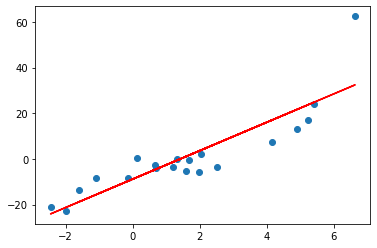

In [5]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='r')
plt.show()

In [6]:
from sklearn.metrics import mean_squared_error, r2_score

print("Coefficients: \n", model.coef_)

print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))

print("Coefficient of determination: %.2f" % r2_score(y, y_pred))

Coefficients: 
 [[6.21473165]]
Mean squared error: 76.27
Coefficient of determination: 0.76


In [7]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=6)
X_poly = polynomial_features.fit_transform(X)

In [8]:
model.fit(X_poly, y)
y_pred = model.predict(X_poly)

In [9]:
print("Coefficients: \n", model.coef_)

print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))

print("Coefficient of determination: %.2f" % r2_score(y, y_pred))

Coefficients: 
 [[ 0.          3.08522534 -2.63200198  0.51413235  0.17293986 -0.05675293
   0.00475714]]
Mean squared error: 6.05
Coefficient of determination: 0.98


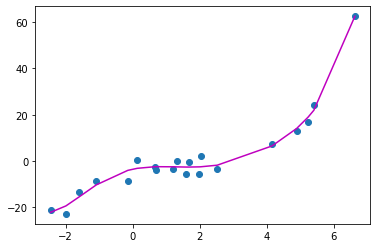

In [10]:
import operator

plt.scatter(X, y)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X, y_pred), key=sort_axis)
X, y_pred = zip(*sorted_zip)

plt.plot(X, y_pred, color='m')
plt.show()